# Assignment 1

## 1. Theory

#### 1.

###### a)

In [1]:
import numpy as np

In [2]:
X = np.array([[-2], [-5], [-3], [0], [-8], [-2], [1], [5], [-1], [6]])
X = np.c_[np.ones(len(X)),X].astype(int)
X = np.array(X)
Y = np.array([[1], [-4], [1], [3], [11], [5], [0], [-1], [3], [1]])
print(X)
print(Y)

[[ 1 -2]
 [ 1 -5]
 [ 1 -3]
 [ 1  0]
 [ 1 -8]
 [ 1 -2]
 [ 1  1]
 [ 1  5]
 [ 1 -1]
 [ 1  6]]
[[ 1]
 [-4]
 [ 1]
 [ 3]
 [11]
 [ 5]
 [ 0]
 [-1]
 [ 3]
 [ 1]]


In [3]:
np.linalg.inv(X.T @ X) @ X.T @ Y

array([[ 1.62523306],
       [-0.41640771]])

##### b)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
reg = LinearRegression().fit(X, Y)
print(reg.coef_)
print(reg.intercept_)

[[ 0.         -0.41640771]]
[1.62523306]


#### 2.

##### a)

In [6]:
from sympy import symbols, diff

In [7]:
x1, x2 = symbols('x1 x2', real=True)
f = (x1 + x2 -2)**2

In [8]:
diff(f,x1)

2*x1 + 2*x2 - 4

In [9]:
diff(f,x2)

2*x1 + 2*x2 - 4

##### b)

In [10]:
import matplotlib.pyplot as plt

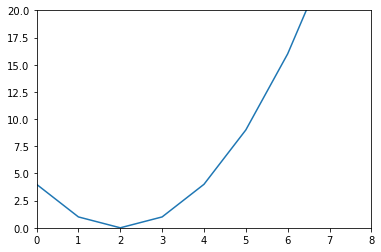

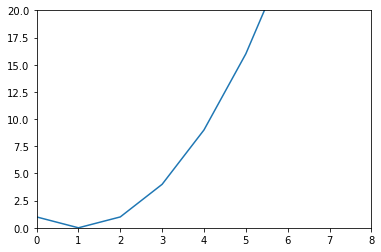

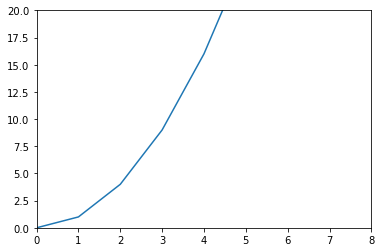

In [11]:
def graph(formula):
    x1 = np.array(range(0, 20))
    J = eval(formula)
    plt.plot(x1,J)
    plt.ylim(0, 20)
    plt.xlim(0,8)
    plt.show()
    
# x2 = 0
#J = (x1 - 2)**2
graph('(x1 - 2)**2')

# x2 = 1
#J = (x1 - 1)**2
graph('(x1 - 1)**2')

# x2 = 2
#J = (x1)**2
graph('(x1)**2')

##### c)

###### x1 + x2 - 2 = 0
###### x1 + x2 = 2
###### This condition has to be true, so any value that satisfies
###### this condition would minimise J

## 2. Closed Form Linear Regression

In [12]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import seaborn as sb # I'm not using this for the assignment, this is just to get a feel for the data

In [13]:
#1 Reads in the data, ignoring the first row (header) and first column (index)
df = pd.read_csv('x06Simple.csv')
del df['Index']

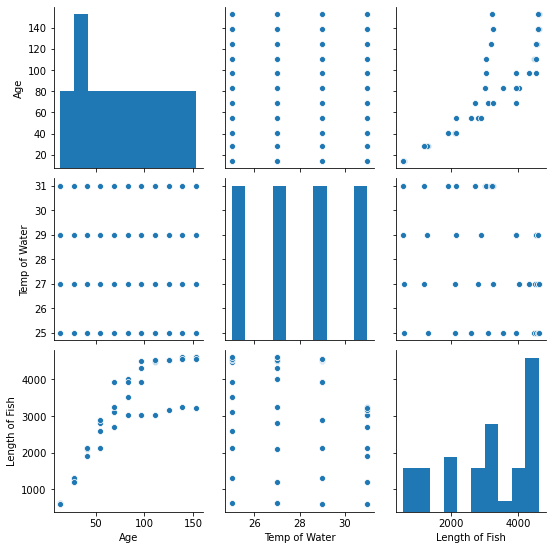

In [14]:
sb.pairplot(df) # I'm not using this for the assignment, this is just to get a feel for the data

In [15]:
#2 Randomizes the data
df = df.sample(frac=1)

In [16]:
#3 Selects the first 2/3 (round up) of the data for training and the remaining for testing
splt = np.random.rand(len(df)) < 0.67
train_df = df[splt]
test_df = df[~splt]

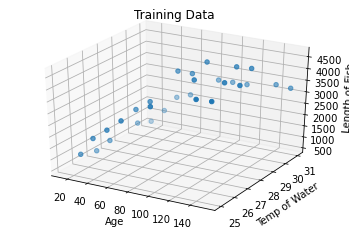

In [17]:
fig = plt.figure().gca(projection='3d')
fig.scatter(train_df['Age'], train_df['Temp of Water'], train_df['Length of Fish'])
fig.set_title('Training Data')
fig.set_xlabel('Age')
fig.set_ylabel('Temp of Water')
fig.set_zlabel('Length of Fish')
plt.show()

In [18]:
#4 Standardizes the data (except for the last column of course) using the training data
age_mean = np.average(train_df['Age'])
age_stddev = np.std(train_df['Age'], ddof=1)
temp_mean = np.average(train_df['Temp of Water'])
temp_stddev = np.std(train_df['Temp of Water'], ddof=1)

print(age_mean)
print(age_stddev)
print(temp_mean)
print(temp_stddev)

83.20689655172414
46.00184725354968
28.17241379310345
2.3614306425984557


In [19]:
X_train = train_df[['Age', 'Temp of Water']]
X_test = test_df[['Age', 'Temp of Water']]

X_train['Age'] = X_train['Age'].apply(lambda age_train: (age_train - age_mean) / age_stddev)
X_train['Temp of Water'] = X_train['Temp of Water'].apply(lambda temp_train: (temp_train - temp_mean) / temp_stddev)

X_test['Age'] = X_test['Age'].apply(lambda age_test: (age_test - age_mean) / age_stddev)
X_test['Temp of Water'] = X_test['Temp of Water'].apply(lambda temp_test: (temp_test - temp_mean) / temp_stddev)

Y_train = train_df['Length of Fish']
Y_test = test_df['Length of Fish']

s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

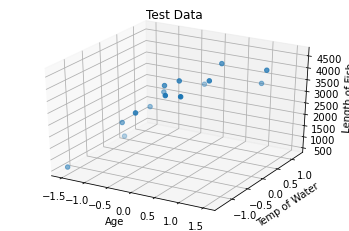

In [20]:
fig = plt.figure().gca(projection='3d')
fig.scatter(X_test['Age'], X_test['Temp of Water'], Y_test, 'bo')
fig.set_title('Test Data')
fig.set_xlabel('Age')
fig.set_ylabel('Temp of Water')
fig.set_zlabel('Length of Fish')
plt.show()

In [21]:
#5 Computes the closed-form solution of linear regression
X = np.c_[np.ones(len(X_train)),X_train]
X = np.array(X)
Y = np.array(Y_train)

In [22]:
thetas = np.linalg.inv(X.T @ X) @ X.T @ Y
thetas

array([3034.68965517, 1145.58474287, -239.90009383])

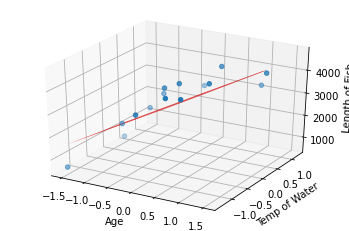

In [23]:
#6 Applies the solution to the testing samples
def y_compute(X1, X2, thetas):
    return (thetas[0] + (thetas[1] * X1) + (thetas[2] * X2))

Y_computed = []

for index, row in test_df[['Age', 'Temp of Water']].iterrows():
    X1 = X_test['Age'][index]
    X2 = X_test['Temp of Water'][index]
    Y = y_compute(X1, X2, thetas)
    Y_computed.append([Y])

Y_computed =  np.array(Y_computed)
Y_computed =  Y_computed.reshape(X_test['Age'].shape)
fig = plt.figure().gca(projection='3d')
fig.scatter(X_test['Age'], X_test['Temp of Water'], Y_test, 'bo')
fig.set_xlabel('Age')
fig.set_ylabel('Temp of Water')
fig.set_zlabel('Length of Fish')

# fig.scatter(X_test['Age'], X_test['Temp of Water'], Y_computed, 'ro')
# fig.plot_wireframe(X_test['Age'], X_test['Temp of Water'], Y_computed, rstride=1, cstride=1)

fig.plot_trisurf(np.array(X_test['Age']), np.array(X_test['Temp of Water']), Y_computed, color='red')

plt.show()

In [24]:
#7 Computes theroot mean squared error
error_squared_sum = 0
# test_std_df = 

for index, row in test_df.iterrows():
    X1 = X_test['Age'][index]
    X2 = X_test['Temp of Water'][index]
    Y_actual = row['Length of Fish']
    Y_predicted = y_compute(X1, X2, thetas)
    error_squared = (Y_actual - Y_predicted)**2
    error_squared_sum += error_squared
    
# for index, row in test_df[['Age', 'Length of Fish']].iterrows():
#     x = X_test_std[index] # row['Age']
#     y_act = row['Length of Fish']
#     y_pred = y_compute(x)
#     error_squared = (y_act - y_pred)**2
#     error_squared_sum += error_squared
#     print(x, y_act, y_pred)
    
mean_error_squared_sum = error_squared_sum / test_df.shape[0]
root_mean_error_squared_sum = mean_error_squared_sum**(0.5)
root_mean_error_squared_sum

572.5234039562503

## 3. Locally-Weighted Linear Regression

In [25]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import seaborn as sb # I'm not using this for the assignment, this is just to get a feel for the data

In [26]:
#1 Read in the data, ignoring the first row (header) and first column (index
df = pd.read_csv('x06Simple.csv')
del df['Index']

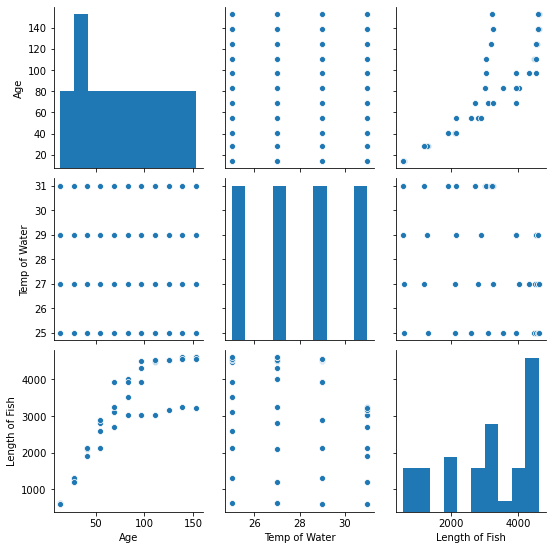

In [27]:
sb.pairplot(df)

In [28]:
#2 Randomize the data
df = df.sample(frac=1)

In [29]:
#3 Select the first 2/3 of the data for training and the remaining for testing
splt = np.random.rand(len(df)) < 0.67
train_df = df[splt]
test_df = df[~splt]

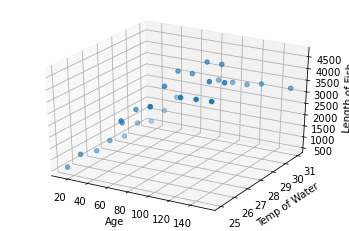

In [30]:
fig = plt.figure().gca(projection='3d')
fig.scatter(train_df['Age'], train_df['Temp of Water'], train_df['Length of Fish'])
fig.set_xlabel('Age')
fig.set_ylabel('Temp of Water')
fig.set_zlabel('Length of Fish')
plt.show()

In [31]:
#4 Standardizes the data (except for the last column of course) using the training data
age_mean = np.average(train_df['Age'])
age_stddev = np.std(train_df['Age'], ddof=1)
temp_mean = np.average(train_df['Temp of Water'])
temp_stddev = np.std(train_df['Temp of Water'], ddof=1)

print(age_mean)
print(age_stddev)
print(temp_mean)
print(temp_stddev)

76.03448275862068
46.18478626949161
28.103448275862068
2.30441854435912


In [32]:
X_train = train_df[['Age', 'Temp of Water']]
X_test = test_df[['Age', 'Temp of Water']]

X_train['Age'] = X_train['Age'].apply(lambda age_train: (age_train - age_mean) / age_stddev)
X_train['Temp of Water'] = X_train['Temp of Water'].apply(lambda temp_train: (temp_train - temp_mean) / temp_stddev)

X_test['Age'] = X_test['Age'].apply(lambda age_test: (age_test - age_mean) / age_stddev)
X_test['Temp of Water'] = X_test['Temp of Water'].apply(lambda temp_test: (temp_test - temp_mean) / temp_stddev)

Y_train = train_df['Length of Fish']
Y_test = test_df['Length of Fish']

s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

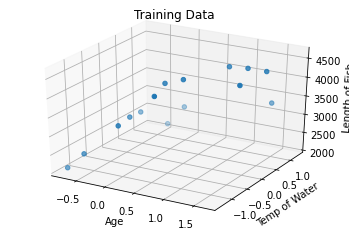

In [33]:
fig = plt.figure().gca(projection='3d')
fig.scatter(X_test['Age'], X_test['Temp of Water'], Y_test, 'bo')
fig.set_title('Training Data')
fig.set_xlabel('Age')
fig.set_ylabel('Temp of Water')
fig.set_zlabel('Length of Fish')
plt.show()

In [34]:
#5
X_tr = np.c_[np.ones(len(X_train)),X_train]
X_tr = np.array(X_tr)
X_ts = np.c_[np.ones(len(X_test)),X_test]
X_ts = np.array(X_ts)
Y_tr = np.array(Y_train)
Y_ts = np.array(Y_test)

# X_tr = np.c_[np.ones(len(X_train_std)),X_train_std]
# X_tr = np.array(X_tr)
# Y_tr = np.array(Y_train)
# X_ts = np.c_[np.ones(len(X_test_std)),X_test_std]
# X_ts = np.array(X_ts)
X_ts

array([[ 1.        ,  1.36333893,  0.38905768],
       [ 1.        ,  1.36333893,  1.25695557],
       [ 1.        , -0.45544181, -1.34673811],
       [ 1.        ,  0.75707868, -1.34673811],
       [ 1.        , -0.15231169, -0.47884022],
       [ 1.        ,  0.15081844, -1.34673811],
       [ 1.        ,  1.06020881,  0.38905768],
       [ 1.        , -0.45544181,  0.38905768],
       [ 1.        , -0.45544181,  1.25695557],
       [ 1.        ,  0.75707868, -0.47884022],
       [ 1.        , -0.15231169,  1.25695557],
       [ 1.        ,  0.45394856, -0.47884022],
       [ 1.        , -0.75857194, -1.34673811],
       [ 1.        ,  1.66646906,  0.38905768],
       [ 1.        ,  1.66646906, -0.47884022]])

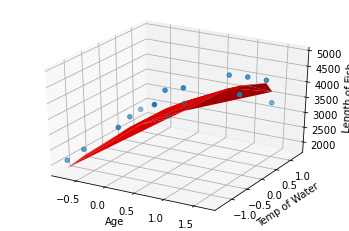

In [35]:
def L2(a_x1, a_x2, b_x1, b_x2):
    return (((a_x1 - b_x1)**2) + ((a_x2 - b_x2)**2))**0.5

def Beta(a_x1, a_x2, b_x1, b_x2,k):
    from math import e
    return e**(-(L2(a_x1, a_x2, b_x1, b_x2))/(k**2))

def y_compute(X1, X2, thetas):
    return (thetas[0] + (thetas[1] * X1) + (thetas[2] * X2))

Y_computed = []
all_thetas = []
Weights = []
error_squared_sum = 0
for test_point, Y_actual in zip(X_ts, Y_ts):
    betas = []
    for train_point in X_tr:
        betas.append(Beta(train_point[1],
                          train_point[2],
                          test_point[1],
                          test_point[2],
                          1))
    W = np.diag(betas)
    thetas = np.linalg.inv(X_tr.T @ W @ X_tr) @ X_tr.T @ W @ Y_tr
    Y_predicted = y_compute(test_point[1], test_point[2], thetas)
    Y_computed.append(Y_predicted)
    error_squared = (Y_actual - Y_predicted)**2
    error_squared_sum += error_squared
    all_thetas.append(thetas)
    Weights.append(W)

fig = plt.figure().gca(projection='3d')
fig.scatter(X_test['Age'], X_test['Temp of Water'], Y_test, 'bo')
fig.set_xlabel('Age')
fig.set_ylabel('Temp of Water')
fig.set_zlabel('Length of Fish')
fig.plot_trisurf(np.array(X_test['Age']), np.array(X_test['Temp of Water']), Y_computed, color='red')
plt.show()

In [36]:
#6
mean_error_squared_sum = error_squared_sum / test_df.shape[0]
root_mean_error_squared_sum = mean_error_squared_sum**(0.5)
root_mean_error_squared_sum

342.5893009047044

## 4. Gradient Descent

In [37]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import seaborn as sb # I'm not using this for the assignment, this is just to get a feel for the data
import random

In [38]:
#1 Read in the data, ignoring the first row (header) and first column (index
df = pd.read_csv('x06Simple.csv')
del df['Index']

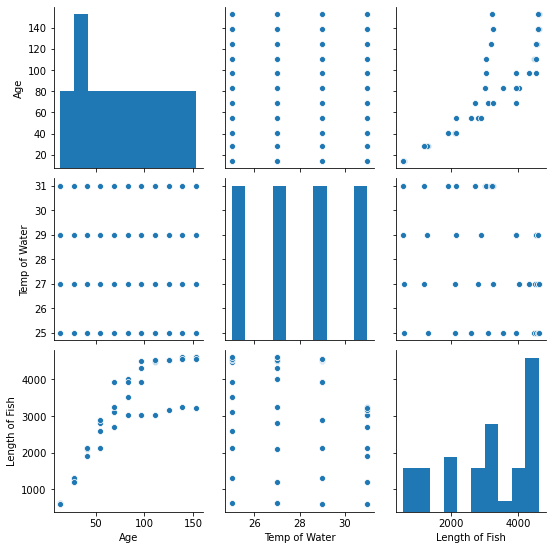

In [39]:
sb.pairplot(df)

In [40]:
#2 Randomize the data
df = df.sample(frac=1)

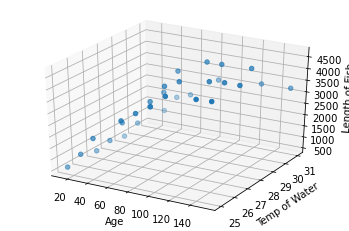

In [41]:
#3 Select the first 2/3 of the data for training and the remaining for testing
splt = np.random.rand(len(df)) < 0.67
train_df = df[splt]
test_df = df[~splt]

fig = plt.figure().gca(projection='3d')
fig.scatter(train_df['Age'], train_df['Temp of Water'], train_df['Length of Fish'])
fig.set_xlabel('Age')
fig.set_ylabel('Temp of Water')
fig.set_zlabel('Length of Fish')
plt.show()

78.84375
45.73211575348687
27.6875
2.1914423001390455


s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

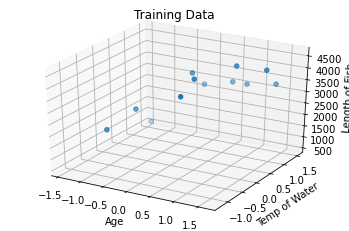

In [42]:
#4 Standardizes the data (except for the last column of course) using the training data
age_mean = np.average(train_df['Age'])
age_stddev = np.std(train_df['Age'], ddof=1)
temp_mean = np.average(train_df['Temp of Water'])
temp_stddev = np.std(train_df['Temp of Water'], ddof=1)

print(age_mean)
print(age_stddev)
print(temp_mean)
print(temp_stddev)

X_train = train_df[['Age', 'Temp of Water']]
X_test = test_df[['Age', 'Temp of Water']]

X_train['Age'] = X_train['Age'].apply(lambda age_train: (age_train - age_mean) / age_stddev)
X_train['Temp of Water'] = X_train['Temp of Water'].apply(lambda temp_train: (temp_train - temp_mean) / temp_stddev)

X_test['Age'] = X_test['Age'].apply(lambda age_test: (age_test - age_mean) / age_stddev)
X_test['Temp of Water'] = X_test['Temp of Water'].apply(lambda temp_test: (temp_test - temp_mean) / temp_stddev)

Y_train = train_df['Length of Fish']
Y_test = test_df['Length of Fish']

fig = plt.figure().gca(projection='3d')
fig.scatter(X_test['Age'], X_test['Temp of Water'], Y_test, 'bo')
fig.set_title('Training Data')
fig.set_xlabel('Age')
fig.set_ylabel('Temp of Water')
fig.set_zlabel('Length of Fish')
plt.show()

In [43]:
#5
X_tr = np.c_[np.ones(len(X_train)),X_train]
X_tr = np.array(X_tr)
X_ts = np.c_[np.ones(len(X_test)),X_test]
X_ts = np.array(X_ts)
Y_tr = np.array(Y_train)
Y_ts = np.array(Y_test)

X_ts

array([[ 1.        ,  1.00927432, -1.22636129],
       [ 1.        , -1.417904  ,  1.51156159],
       [ 1.        , -0.52137868, -0.31372033],
       [ 1.        ,  1.62153552,  0.59892063],
       [ 1.        ,  1.00927432,  0.59892063],
       [ 1.        ,  0.09088252,  0.59892063],
       [ 1.        , -0.52137868, -1.22636129],
       [ 1.        ,  0.39701312,  1.51156159],
       [ 1.        , -0.21524808,  1.51156159],
       [ 1.        ,  1.31540492,  1.51156159],
       [ 1.        ,  0.70314372, -0.31372033],
       [ 1.        ,  0.70314372,  1.51156159]])

Initial theta:  [-0.60905207  0.53992742  0.95261525]
new theta [3020.59375    1231.44548875 -164.7353217 ]
104


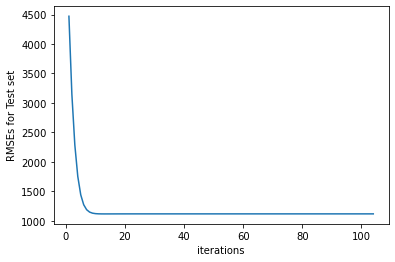

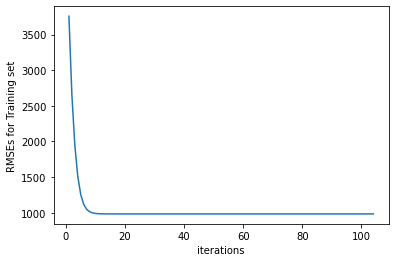

In [44]:
def compute_new_theta(theta, eta, X, Y):
    return theta - (eta * (2 * X.T @ ((X @ theta) - Y)))

theta = []
for i in range(3):
    theta.append(random.uniform(-1,1))
theta = np.array(theta)
new_theta = np.array(theta)

print('Initial theta: ',theta)

def y_compute(X1, X2, thetas):
    return (thetas[0] + (thetas[1] * X1) + (thetas[2] * X2))

iteration = 0
iterations = []
RMSEs_test = []
RMSEs_train = []

while True:
    N = 2
    new_theta = np.array(compute_new_theta(theta, 0.01/N, X_tr, Y_tr))
    if (new_theta == theta).all():
        break
    
    error_squared_sum = 0

    for index, row in train_df.iterrows():
        X1 = X_train['Age'][index]
        X2 = X_train['Temp of Water'][index]
        Y_actual = row['Length of Fish']
        Y_predicted = y_compute(X1, X2, new_theta)
        error_squared = (Y_actual - Y_predicted)**2
        error_squared_sum += error_squared
    
    mean_error_squared_sum = error_squared_sum / test_df.shape[0]
    root_mean_error_squared_sum = mean_error_squared_sum**(0.5)
    RMSEs_train.append(root_mean_error_squared_sum)
    
    for index, row in test_df.iterrows():
        X1 = X_test['Age'][index]
        X2 = X_test['Temp of Water'][index]
        Y_actual = row['Length of Fish']
        Y_predicted = y_compute(X1, X2, new_theta)
        error_squared = (Y_actual - Y_predicted)**2
        error_squared_sum += error_squared
    
    mean_error_squared_sum = error_squared_sum / test_df.shape[0]
    root_mean_error_squared_sum = mean_error_squared_sum**(0.5)
    RMSEs_test.append(root_mean_error_squared_sum)
    
    theta = new_theta
    iteration = iteration + 1
    iterations.append(iteration)

print('new theta',new_theta)
print(iteration)


plt.axes(xlabel='iterations', ylabel='RMSEs for Test set')
plt.plot(iterations, RMSEs_test)
plt.show()

plt.axes(xlabel='iterations', ylabel='RMSEs for Training set')
plt.plot(iterations, RMSEs_train)
plt.show()


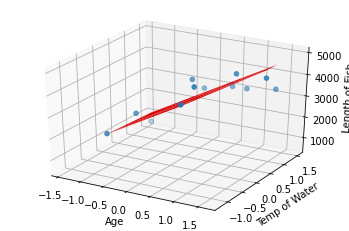

In [45]:


Y_computed = []

for index, row in test_df[['Age', 'Temp of Water']].iterrows():
    X1 = X_test['Age'][index]
    X2 = X_test['Temp of Water'][index]
    Y = y_compute(X1, X2, new_theta)
    Y_computed.append([Y])

Y_computed =  np.array(Y_computed)
Y_computed =  Y_computed.reshape(X_test['Age'].shape)
fig = plt.figure().gca(projection='3d')
fig.scatter(X_test['Age'], X_test['Temp of Water'], Y_test, 'bo')
fig.set_xlabel('Age')
fig.set_ylabel('Temp of Water')
fig.set_zlabel('Length of Fish')

# fig.scatter(X_test['Age'], X_test['Temp of Water'], Y_computed, 'ro')
# fig.plot_wireframe(X_test['Age'], X_test['Temp of Water'], Y_computed, rstride=1, cstride=1)

fig.plot_trisurf(np.array(X_test['Age']), np.array(X_test['Temp of Water']), Y_computed, color='red')

plt.show()

In [46]:
#6
error_squared_sum = 0

for index, row in test_df.iterrows():
    X1 = X_test['Age'][index]
    X2 = X_test['Temp of Water'][index]
    Y_actual = row['Length of Fish']
    Y_predicted = y_compute(X1, X2, new_theta)
    error_squared = (Y_actual - Y_predicted)**2
    error_squared_sum += error_squared
    
# for index, row in test_df[['Age', 'Length of Fish']].iterrows():
#     x = X_test_std[index] # row['Age']
#     y_act = row['Length of Fish']
#     y_pred = y_compute(x)
#     error_squared = (y_act - y_pred)**2
#     error_squared_sum += error_squared
#     print(x, y_act, y_pred)
    
mean_error_squared_sum = error_squared_sum / test_df.shape[0]
root_mean_error_squared_sum = mean_error_squared_sum**(0.5)
root_mean_error_squared_sum

534.0598379995229